In [6]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from math import exp
paleta = "coolwarm"

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2220 - Calculo para Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2023-1**<br>
**Profesor:** Eduardo Cerpa <br>
**Ayudante:** Pablo Rademacher <br>
**Integrantes:** Cristobal Strange, A=LU PA=LU, Bastian Baez Oses <br>





---

In [390]:
# Dataframe de los datos de la pregunta 1

df = pd.read_csv('P1grupo_5.csv', sep=',', decimal='.')
display(df)

,x,y
0,0.005,1.681746
1,0.024,1.242354
2,0.026,3.893214
3,0.031,4.679515
4,0.036,2.742924
...,...,...
995,9.935,33.861650
996,9.940,41.323003
997,9.956,27.448824
998,9.961,34.040112


In [391]:
# Se crea la matriz A

cantidad_datos= len(df)
A = np.zeros((cantidad_datos, 3))
A[:,1] = df['x']
A[:,2] = df['x'] ** 2
A[:,0] = 1
A

array([[1.0000000e+00, 5.0000000e-03, 2.5000000e-05],
       [1.0000000e+00, 2.4000000e-02, 5.7600000e-04],
       [1.0000000e+00, 2.6000000e-02, 6.7600000e-04],
       ...,
       [1.0000000e+00, 9.9560000e+00, 9.9121936e+01],
       [1.0000000e+00, 9.9610000e+00, 9.9221521e+01],
       [1.0000000e+00, 9.9880000e+00, 9.9760144e+01]])

In [392]:
# Se crea el vector b

b = np.zeros((cantidad_datos, 1))
b[:,0] = df['y']
b

array([[1.68174622e+00],
       [1.24235414e+00],
       [3.89321436e+00],
       [4.67951473e+00],
       [2.74292413e+00],
       [2.38661960e+00],
       [2.22943776e+00],
       [1.77544418e+00],
       [5.57148689e-03],
       [3.68223624e+00],
       [1.22354420e+00],
       [9.17894109e-01],
       [2.55494225e-01],
       [5.32924928e+00],
       [2.56831431e+00],
       [3.86167934e-01],
       [3.18273557e+00],
       [6.93338287e+00],
       [8.91456872e-01],
       [8.71829008e-02],
       [1.93614741e+00],
       [8.30521072e-01],
       [4.37144392e-01],
       [4.84301332e+00],
       [7.34223234e-01],
       [6.07795868e+00],
       [8.86350928e+00],
       [1.75710734e+00],
       [7.66192651e-01],
       [1.85199102e+00],
       [1.88410185e+00],
       [3.31921066e+00],
       [5.25898531e+00],
       [6.86702612e+00],
       [1.85721579e+00],
       [5.81768852e+00],
       [2.40355522e+00],
       [4.90652608e+00],
       [8.04804119e-01],
       [2.42145594e+00],


In [393]:
# Se calcula la solución de la regresión lineal

def regresion_lineal(A, b, lambda_ = 1e-9):
    try:
        # Si la matriz AtA es invertible, se calcula la solución
        AtA_inv = np.linalg.inv(A.T @ A)
        x = AtA_inv @ A.T @ b

    except np.linalg.LinAlgError:
        # Si la matriz no es invertible, se agrega lambda_ a la diagonal de AtA hasta que sea invertible
        AtA = A.T @ A
        while np.linalg.det(AtA) == 0:
            AtA += lambda_ * np.identity(AtA.shape[0])
            lambda_ += 0.1
        AtA_inv = np.linalg.inv(AtA)
        x = AtA_inv @ A.T @ b
    return x
        
        


In [394]:
# Se calcula la solución de la regresión lineal

x = regresion_lineal(A, b)
x

array([[2.44011204],
       [0.05691221],
       [0.3299325 ]])

In [395]:
# Se calcula el polinomio de la regresión lineal

polinomio = np.poly1d([x[2,0], x[1,0], x[0,0]])
polinomio

poly1d([0.3299325 , 0.05691221, 2.44011204])

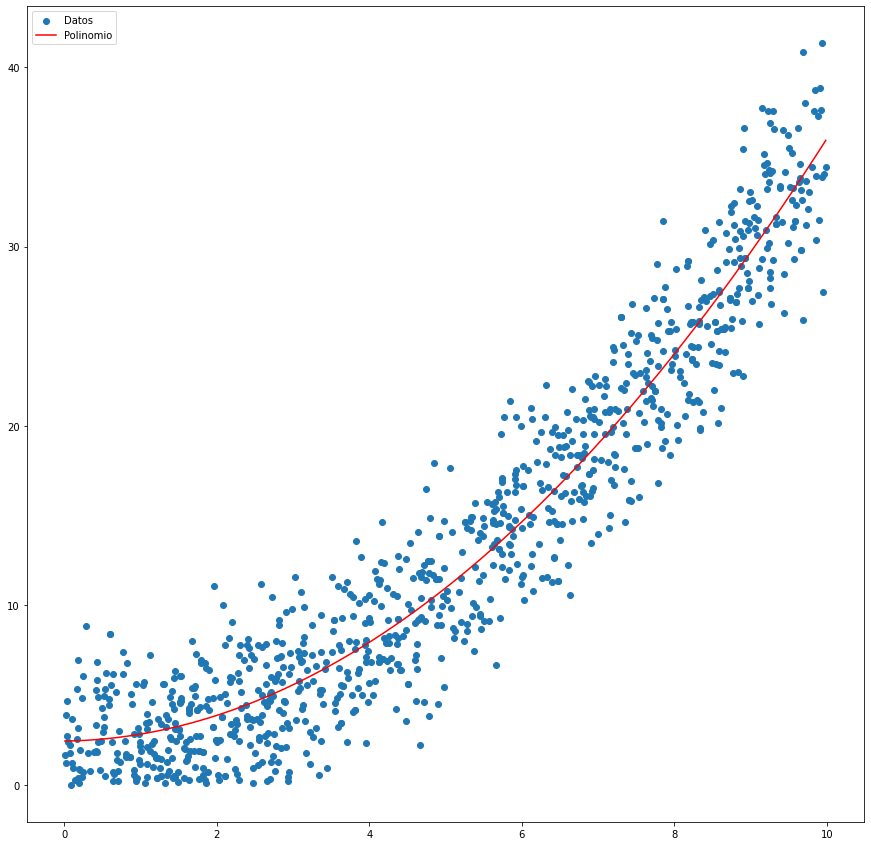

In [396]:
# Obtén los valores de 'X' y 'Y' del DataFrame
x = df['x']
y = df['y']

# Evalúa el polinomio en los valores de 'X' para obtener los valores ajustados
y_fit = polinomio(x)

# Crea una figura y un conjunto de ejes con un tamaño más grande
fig, ax = plt.subplots(figsize=(15, 15))

# Grafica los puntos 'X' e 'Y'
ax.scatter(x, y, label='Datos')

# Grafica la curva ajustada utilizando el polinomio
ax.plot(x, y_fit, color='red', label='Polinomio')

ax.legend()

# Guarda la imagen del gráfico en formato PNG
plt.savefig('grafico.png')

# Muestra el gráfico
plt.show()

In [3]:
df_2 = pd.read_csv("P2grupo_5.csv", header=None)
df_2.columns = ["X_1","X_2","X_3","Y"]
df_2.head()

,X_1,X_2,X_3,Y
0,-2.686493,1.194156,-1.523732,0.0
1,1.169620,4.006380,1.887160,1.0
2,0.465563,-1.786808,-1.379655,1.0
3,-1.577050,2.124255,3.133464,1.0
4,4.388471,2.247836,4.966874,1.0


In [9]:
#Se definen las funciones usadas.
def J(a,b,c,d,e,f):
    y = df_2["Y"]
    suma = 0
    for i in range(len(df_2)):
        y_i = y[i]
        parte = a*(df_2["X_1"][i])+b*(df_2["X_2"][i])+c*(df_2["X_3"][i])+e
        Y = sigmoide(parte)
        
        Z = sigmoide(d*Y + f)
        
        suma += (y_i - Z)**2
    return suma/len(df_2)

def sigmoide(t: float):
    return 1/(1 + exp(-t))

def derivada_sigmoide(t: float):
    return (exp(-t)/(1 + exp(-t)) ** 2)

def funcion_lambda(a, b, c, d, e, f, u, v, w):
    return d*(sigmoide(funcion_phi(a, b, c, e, u, v, w)) + f)

def funcion_phi(a, b, c, e, u ,v ,w):
    return a*u + b*v + c*w + e

#Se definen las derivadas de j, para construir el gradiente más adelante.
def j_respecto_a(a,b,c,d,e,f,x1,x2,x3,y):
    suma = 0
    for i in range(len(x1)):
        u = x1[i]
        v = x2[i]
        w = x3[i]
        z = y[i]
        sigma_prima_l = derivada_sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        sigma_prima_p = derivada_sigmoide(funcion_phi(a, b, c, e, u ,v ,w))
        sigma_l = sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        suma += (sigma_prima_l* d *sigma_prima_p* u *(sigma_l - z))
    suma = (suma*2)/len(x1)
    return suma

def j_respecto_b(a,b,c,d,e,f,x1,x2,x3,y):
    suma = 0
    for i in range(len(x1)):
        u = x1[i]
        v = x2[i]
        w = x3[i]
        z = y[i]
        sigma_prima_l = derivada_sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        sigma_prima_p = derivada_sigmoide(funcion_phi(a, b, c, e, u ,v ,w))
        sigma_l = sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        suma += (sigma_prima_l* d *sigma_prima_p* v *(sigma_l - z))
    suma = (suma*2)/len(x1)
    return suma
def j_respecto_c(a,b,c,d,e,f,x1,x2,x3,y):
    suma = 0
    for i in range(len(x1)):
        u = x1[i]
        v = x2[i]
        w = x3[i]
        z = y[i]
        sigma_prima_l = derivada_sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        sigma_prima_p = derivada_sigmoide(funcion_phi(a, b, c, e, u ,v ,w))
        sigma_l = sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        suma += (sigma_prima_l* d *sigma_prima_p* w *(sigma_l - z))
    suma = (suma*2)/len(x1)
    return suma
def j_respecto_d(a,b,c,d,e,f,x1,x2,x3,y):
    suma = 0
    for i in range(len(x1)):
        u = x1[i]
        v = x2[i]
        w = x3[i]
        z = y[i]
        sigma_prima_l = derivada_sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        sigma_p = sigmoide(funcion_phi(a, b, c, e, u ,v ,w))
        sigma_l = sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        suma += (sigma_prima_l *sigma_p *(sigma_l - z))
    suma = (suma*2)/len(x1)
    return suma
def j_respecto_e(a,b,c,d,e,f,x1,x2,x3,y):
    suma = 0
    for i in range(len(x1)):
        u = x1[i]
        v = x2[i]
        w = x3[i]
        z = y[i]
        sigma_prima_l = derivada_sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        sigma_prima_p = derivada_sigmoide(funcion_phi(a, b, c, e, u ,v ,w))
        sigma_l = sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        suma += (sigma_prima_l *sigma_prima_p *(sigma_l - z))
    suma = (suma*2)/len(x1)
    return suma
def j_respecto_f(a,b,c,d,e,f,x1,x2,x3,y):
    suma = 0
    for i in range(len(x1)):
        u = x1[i]
        v = x2[i]
        w = x3[i]
        z = y[i]
        sigma_prima = derivada_sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        sigma_l = sigmoide(funcion_lambda(a,b,c,d,e,f,u,v,w))
        suma += (sigma_prima * (sigma_l - z))
    suma = (suma*2)/len(x1)
    return suma

In [10]:
%%time
np.random.seed(0)
a_0,b_0,c_0,d_0,e_0,f_0 = np.random.uniform(-5,5., 6) #a,b,c,d,e,f #Se instancian los primeros pesos y sesgos
a_k,b_k,c_k,d_k,e_k,f_k = a_0,b_0,c_0,d_0,e_0,f_0
epsilon = 0.1
errores = []

for i in range(2000):
    izq = np.transpose(np.array([a_k,b_k,c_k,d_k,e_k,f_k])) #Parte izquierda de la Resta.
    
    gradiente = []
    gradiente.append(j_respecto_a(a_k,b_k,c_k,d_k,e_k,f_k,df_2["X_1"],df_2["X_2"],df_2["X_3"],df_2["Y"]))#der_a
    gradiente.append(j_respecto_b(a_k,b_k,c_k,d_k,e_k,f_k,df_2["X_1"],df_2["X_2"],df_2["X_3"],df_2["Y"]))#der_b
    gradiente.append(j_respecto_c(a_k,b_k,c_k,d_k,e_k,f_k,df_2["X_1"],df_2["X_2"],df_2["X_3"],df_2["Y"]))#der_c
    gradiente.append(j_respecto_d(a_k,b_k,c_k,d_k,e_k,f_k,df_2["X_1"],df_2["X_2"],df_2["X_3"],df_2["Y"]))#der_d
    gradiente.append(j_respecto_e(a_k,b_k,c_k,d_k,e_k,f_k,df_2["X_1"],df_2["X_2"],df_2["X_3"],df_2["Y"]))#der_e
    gradiente.append(j_respecto_f(a_k,b_k,c_k,d_k,e_k,f_k,df_2["X_1"],df_2["X_2"],df_2["X_3"],df_2["Y"]))#der_f
    gradiente = np.array(gradiente) #Se construye el gradiente a partir de las derivadas parciales.
    
    errores.append(J(a_k,b_k,c_k,d_k,e_k,f_k)) #Se guarda el error medio
    
    der = epsilon*gradiente # Parte derecha de la resta.
    
    
    #Se reasignan los pesos y sesgos, para la siguiente iteración.
    a_k = izq[0] - der[0]
    b_k = izq[1] - der[1]
    c_k = izq[2] - der[2]
    d_k = izq[3] - der[3]
    e_k = izq[4] - der[4]
    f_k = izq[5] - der[5]


CPU times: total: 3min 18s
Wall time: 3min 30s


In [11]:
print(a_k, b_k, c_k, d_k, e_k, f_k) # los pesos y sesgos sub-2000, son los que quedaron de la última iteración.

print("J:", J(a_k, b_k, c_k, d_k, e_k, f_k))

1.487723445712462 1.3466989694923595 0.9876736242823013 1.4687374876818604 -1.6102807768191858 -0.37951123522620306
J: 0.22343857547130108


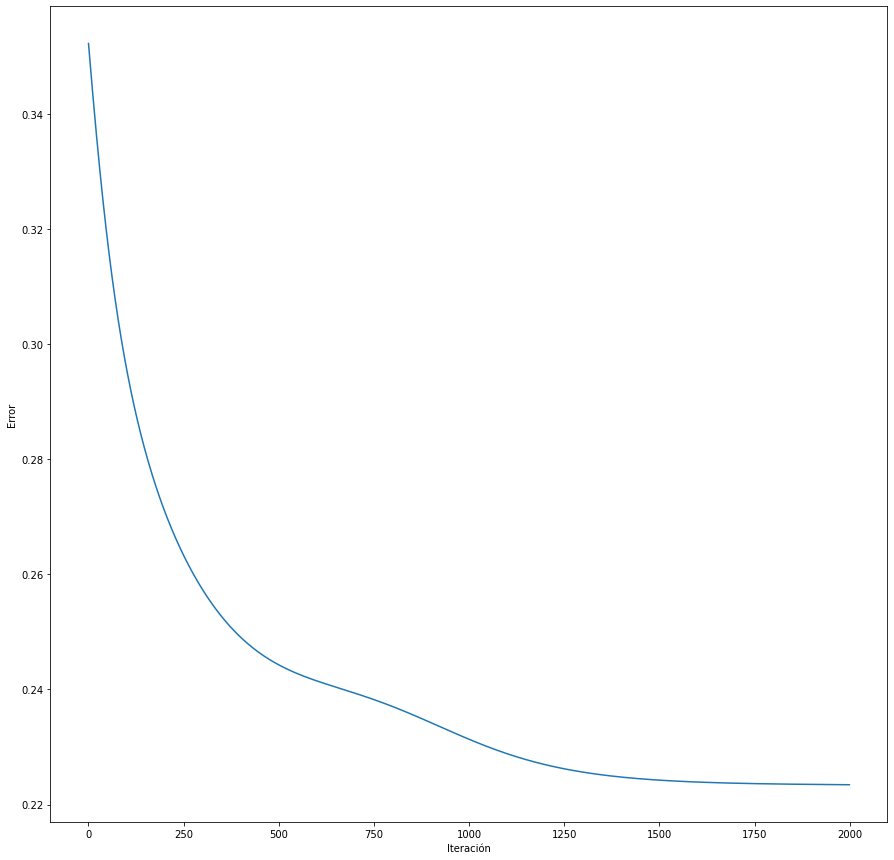

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_ylabel("Error")
ax.set_xlabel("Iteración")
sns.lineplot(x=range(0,2000),y=errores)
plt.savefig('grafico2.png')

<Figure size 432x288 with 0 Axes>